# Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy
from scipy import stats 
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Read Dataset into Pandas Dataframe

In [2]:
#Reading data into pandas df
df = pd.read_csv("https://raw.githubusercontent.com/chiraggarg95/DS-203-Assignments/Assignment_4/master.csv")

# Display part of Dataset

In [3]:
#Displaying part of dataset
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Number of records and variables



In [4]:
#getting number of records and variables
records = df.shape[0]
variables = df.shape[1]
print("The data has " + str(records) + " records and " + str(variables) + " variables.")

The data has 27820 records and 12 variables.


# List of variables

In [5]:
#getting the variable names
print("The following variables are available in the dataset: ")
i=0
for var in list(df.columns):
    print(var)

The following variables are available in the dataset: 
country
year
sex
age
suicides_no
population
suicides/100k pop
country-year
HDI for year
 gdp_for_year ($) 
gdp_per_capita ($)
generation


# Datatype of Variables

In [6]:
#getting datatype of each variable
print("The following are the python datatypes of the variables available in the dataset: ")
df.dtypes

The following are the python datatypes of the variables available in the dataset: 


country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

# Unique Values

In [7]:
#getting number of unique values for each variable
print("The number of unique values are: ")
for col in df.columns:
    print(col + ": " + str(df[col].nunique()))

The number of unique values are: 
country: 101
year: 32
sex: 2
age: 6
suicides_no: 2084
population: 25564
suicides/100k pop: 5298
country-year: 2321
HDI for year: 305
 gdp_for_year ($) : 2321
gdp_per_capita ($): 2233
generation: 6


# Identifying Data types
 

<table>
        <tr>
            <th>Column Name</th>
            <th>Discrete/Continuous</th>
            <th>Other</th>
        </tr>
        <tr>
            <td>country</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>        
        <tr>
            <td>year</td>
            <td>D</td>
            <td>Temporal</td>
        </tr>        
        <tr>
            <td>sex</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>        
        <tr>
            <td>age</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>        
        <tr>
            <td>suicides_no</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>        
        <tr>
            <td>population</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>        
        <tr>
            <td>suicides/100k pop</td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>        
        <tr>
            <td>country-year</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>        
        <tr>
            <td>HDI for year</td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>        
        <tr>
            <td> gdp_for_year (\$) </td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>        
        <tr>
            <td>gdp_per_capita (\$)</td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>        
        <tr>
            <td>generation</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>        
    </table>

# Number of Missing entries for each variable

In [8]:
# getting Number of Missing entries for each variable
print("The number of missing values are: ")
for col in df.columns:
    print(col + ": " + str(df[col].isna().sum()))

The number of missing values are: 
country: 0
year: 0
sex: 0
age: 0
suicides_no: 0
population: 0
suicides/100k pop: 0
country-year: 0
HDI for year: 19456
 gdp_for_year ($) : 0
gdp_per_capita ($): 0
generation: 0


# Number of Records with no missing entries

In [9]:
# getting Number of Records with no missing entries
print("The number of records with no missing entries are: " + str(((df.isna().sum(axis=1) - 1)*-1).sum()))

The number of records with no missing entries are: 8364


# Data Modification

### Removing redundant variables: 
<ul>
    <li>'country-year': both country and year are individually present</li>
    <li>'HDI for year': number of missing entries is high.</li>
</ul>

In [10]:
# removing columns
df = df.drop(columns=["country-year", "HDI for year"])

### Converting  " gdp_for_year (\$) " datatype from 'object' to 'float64': 
    

In [11]:
df[" gdp_for_year ($) "] = df[" gdp_for_year ($) "].str.replace(",","").astype(float)

# Visualising the dataset once again

In [12]:
# viewing final dataset
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2.156625e+09,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2.156625e+09,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2.156625e+09,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2.156625e+09,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2.156625e+09,796,Boomers


# Final shape of dataset

In [13]:
# getting final shape of dataset
df.shape

(27820, 10)

# Final data types of variables

<table>
        <tr>
            <th>Column Name</th>
            <th>Discrete/Continuous</th>
            <th>Other</th>
        </tr>
        <tr>
            <td>country</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>        
        <tr>
            <td>year</td>
            <td>D</td>
            <td>Temporal</td>
        </tr>        
        <tr>
            <td>sex</td>
            <td>D</td>
            <td>Categorical</td>
        </tr>        
        <tr>
            <td>age</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>        
        <tr>
            <td>suicides_no</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>        
        <tr>
            <td>population</td>
            <td>C</td>
            <td>Quantised Continuous</td>
        </tr>        
        <tr>
            <td>suicides/100k pop</td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>               
        <tr>
            <td> gdp_for_year (\$) </td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>        
        <tr>
            <td>gdp_per_capita (\$)</td>
            <td>C</td>
            <td>Float Continuous</td>
        </tr>        
        <tr>
            <td>generation</td>
            <td>D</td>
            <td>Ordinal</td>
        </tr>        
    </table>

# EDA on Discrete Variables

In [14]:
disc_var = ["country", "year", "sex", "age", "generation"]

## Histograms

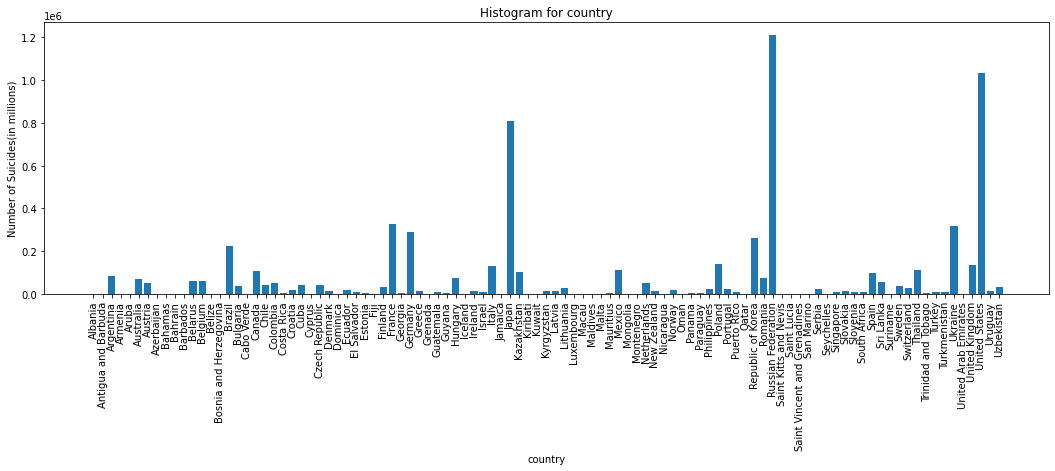

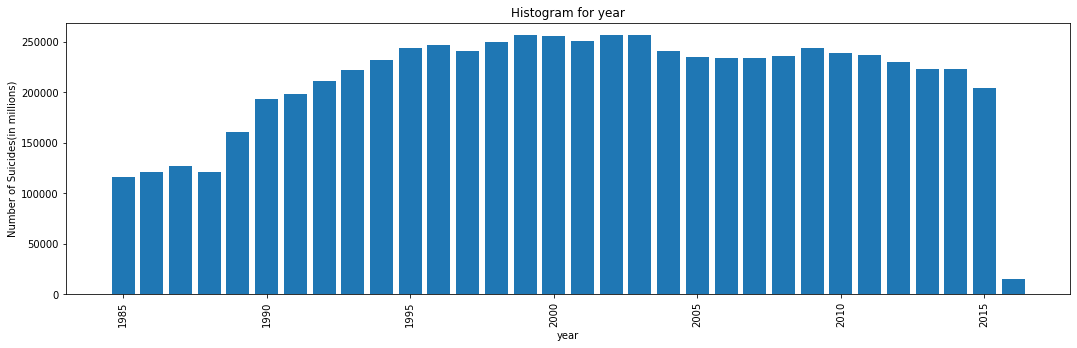

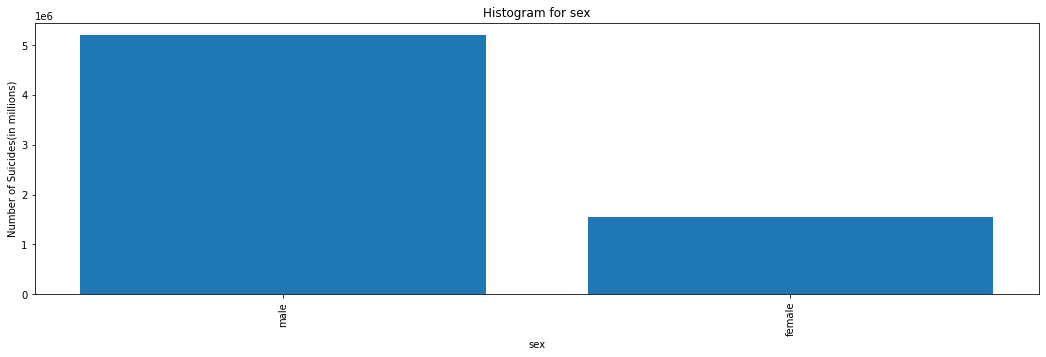

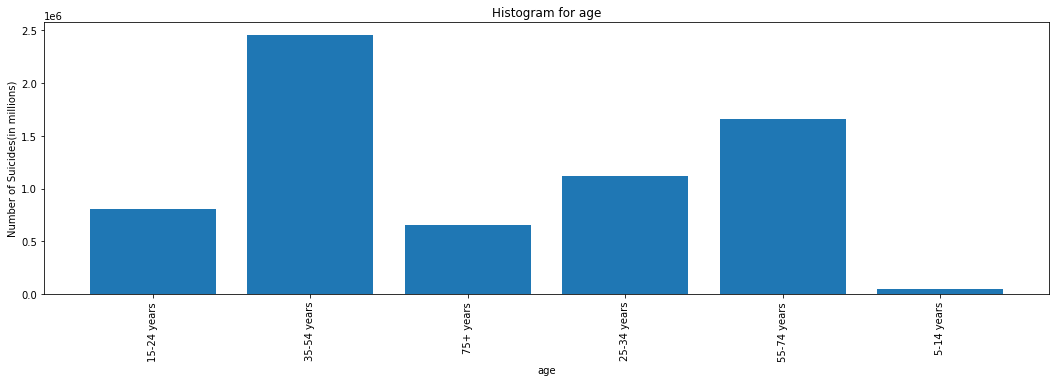

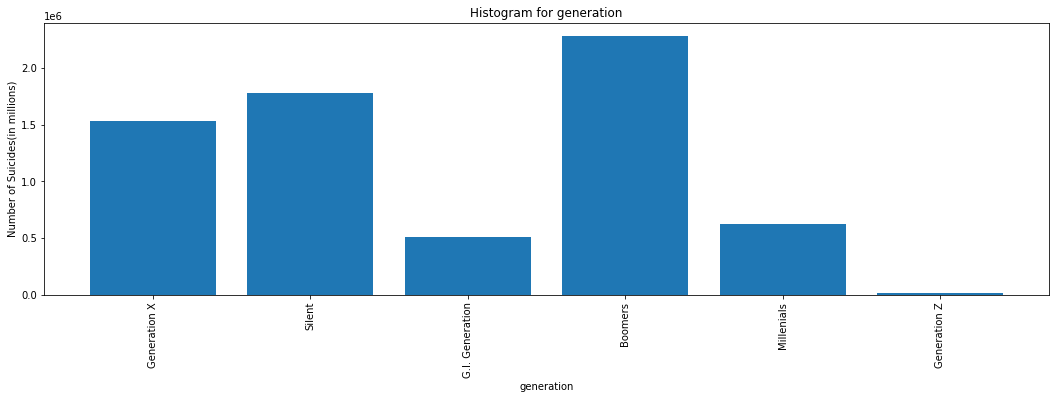

In [15]:
for var in disc_var: 
    a=[]
    b=[]
    for row in pd.unique(df[var]):
        a.append(row)
        b.append(df.loc[df[var] == row]['suicides_no'].sum()) 
    plt.figure(figsize=(18,5))

    plt.title("Histogram for " + var)
    plt.xlabel (var)
    plt.xticks(Rotation=90)
    plt.ylabel("Number of Suicides(in millions)")
    plt.bar(a,b)

## Finding the Mode value


In [16]:
#getting mode for each variable

for var in disc_var:
    print("The mode value(s) of " + var + "  are: ")
    for mode in df[var].mode():
        print(mode)
    print()

The mode value(s) of country  are: 
Austria
Iceland
Mauritius
Netherlands

The mode value(s) of year  are: 
2009

The mode value(s) of sex  are: 
female
male

The mode value(s) of age  are: 
15-24 years
25-34 years
35-54 years
55-74 years
75+ years

The mode value(s) of generation  are: 
Generation X



## Getting the Entropy Values

In [17]:
#getting entropy values for discrete variables
print("The entropy values for the discrete variables are as follows: ")
for var in disc_var:
    print(var + ": " + str(entropy(df[var].value_counts(), base=2)))
    print()

The entropy values for the discrete variables are as follows: 
country: 6.509606001511676

year: 4.952708775332643

sex: 1.0

age: 2.584957721382318

generation: 2.4460161350809893



# Continuous Variables

## Some statistics for continuous variables

#### Note: Here 25%, 50%, 75% represent 25th percentile,  50th percentile, 75th percentile respectively


In [18]:
#getting stats for continuous variables
cont_var = ["suicides_no", "population", "suicides/100k pop", " gdp_for_year ($) ", "gdp_per_capita ($)"]
for var in cont_var:
    print("Following are some statistics for " + var + ": ")
    for key in df[var].describe().keys():
        print(key + ": " + str(df[var].describe()[key]))
    print("Inter quartile range" + ": " + str(stats.iqr(df[var], interpolation='midpoint')))
    print("Variance" + ": " + str(df[var].var()))
    print("Skew" + ": " + str(df[var].skew()))
    print("Median" + ": " + str(df[var].median()))
    print()

Following are some statistics for suicides_no: 
count: 27820.0
mean: 242.57440690150972
std: 902.04791683365
min: 0.0
25%: 3.0
50%: 25.0
75%: 131.0
max: 22338.0
Inter quartile range: 128.0
Variance: 813690.4442639275
Skew: 10.352910335856805
Median: 25.0

Following are some statistics for population: 
count: 27820.0
mean: 1844793.6173975556
std: 3911779.4417563686
min: 278.0
25%: 97498.5
50%: 430150.0
75%: 1486143.25
max: 43805214.0
Inter quartile range: 1388698.5
Variance: 15302018400947.766
Skew: 4.459414421535874
Median: 430150.0

Following are some statistics for suicides/100k pop: 
count: 27820.0
mean: 12.816097411933894
std: 18.96151101450304
min: 0.0
25%: 0.92
50%: 5.99
75%: 16.62
max: 224.97
Inter quartile range: 15.700000000000001
Variance: 359.53889995312005
Skew: 2.963414476605633
Median: 5.99

Following are some statistics for  gdp_for_year ($) : 
count: 27820.0
mean: 445580969025.7271
std: 1453609985940.9163
min: 46919625.0
25%: 8985352832.0
50%: 48114688201.0
75%: 2602024

## Box and Whiskers Plot for Continuous Variables

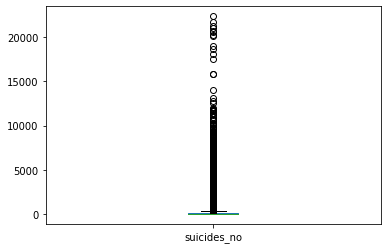

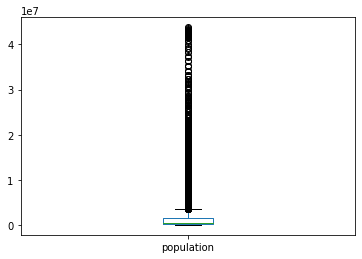

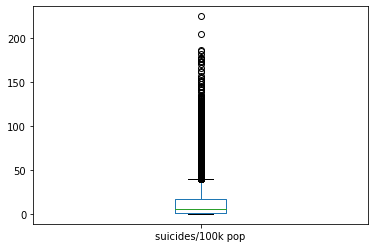

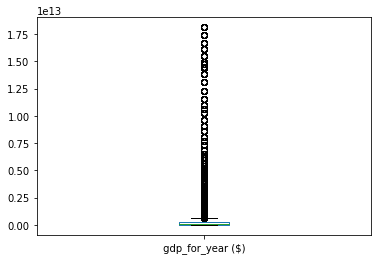

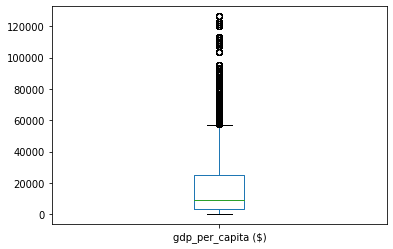

In [19]:
for var in cont_var:
    df[var].plot.box()
    plt.show()

## Histogram for continuous variables

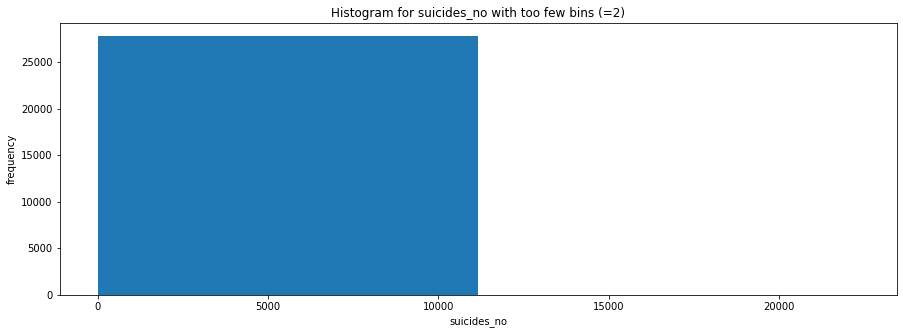

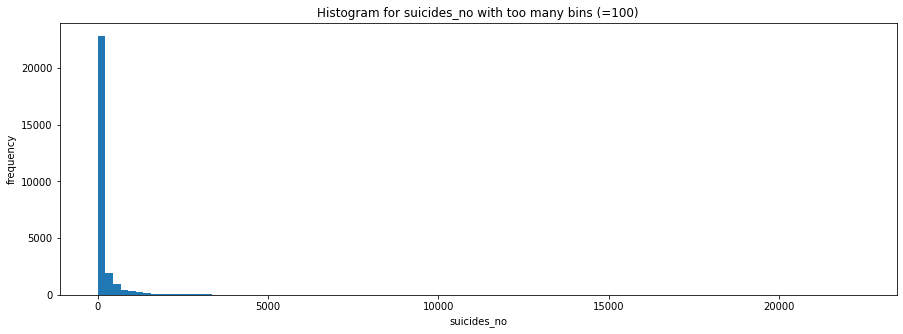

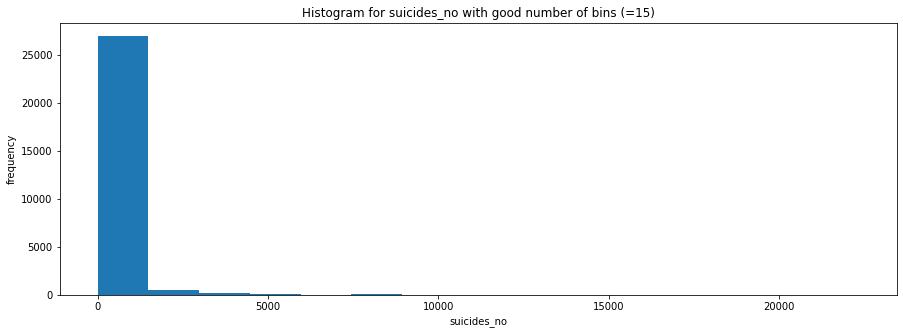

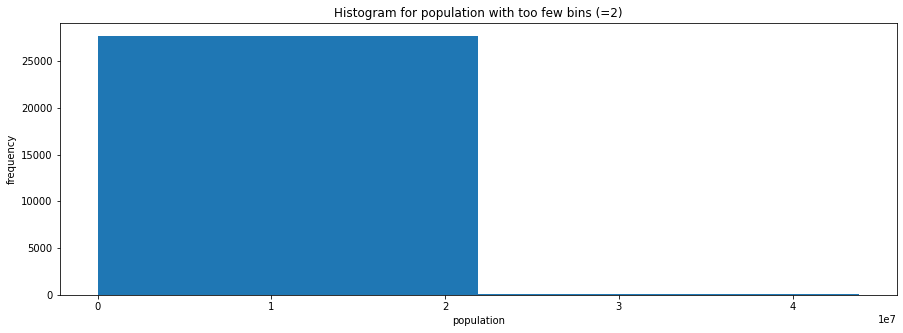

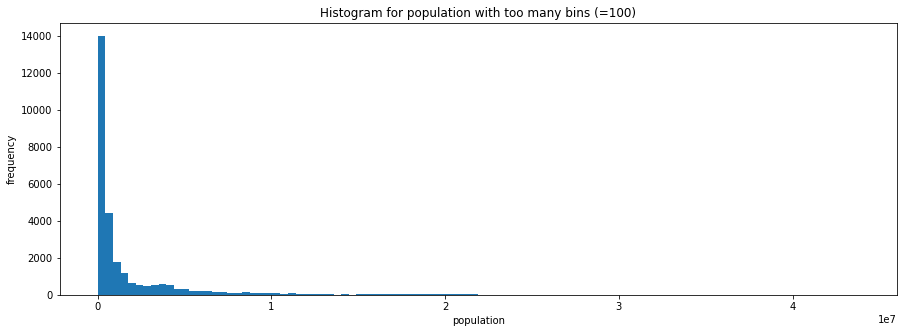

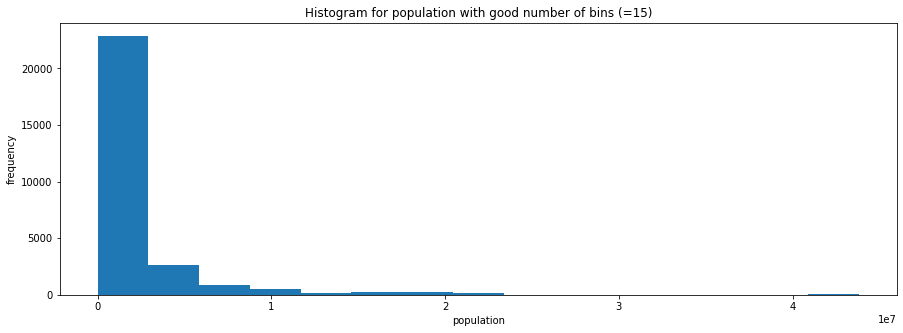

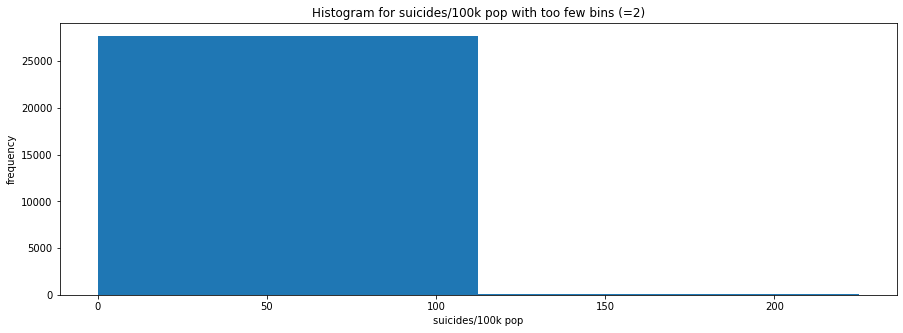

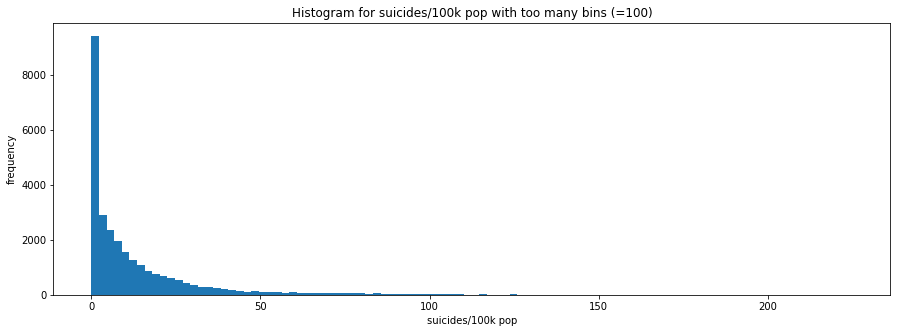

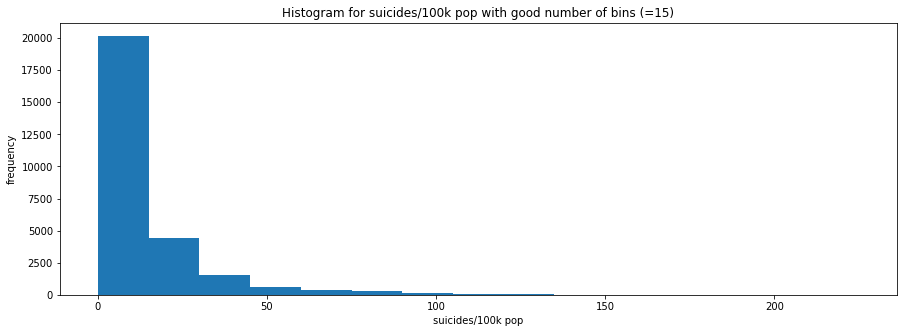

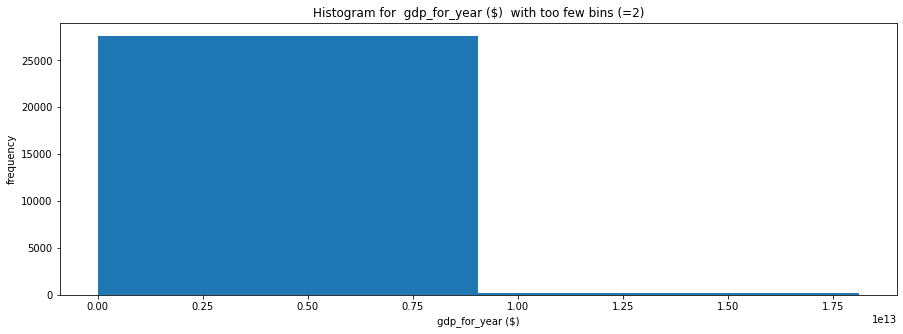

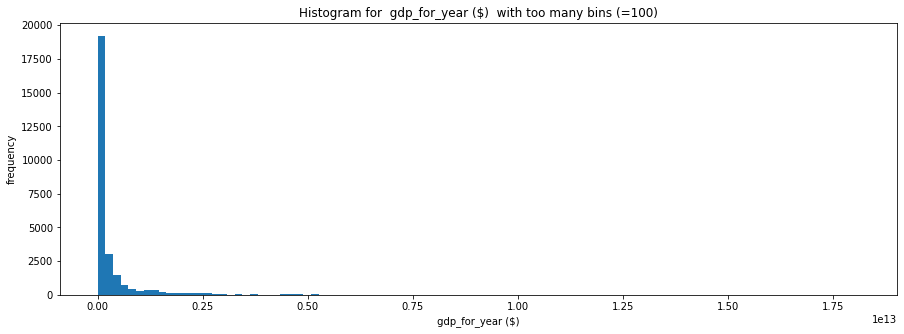

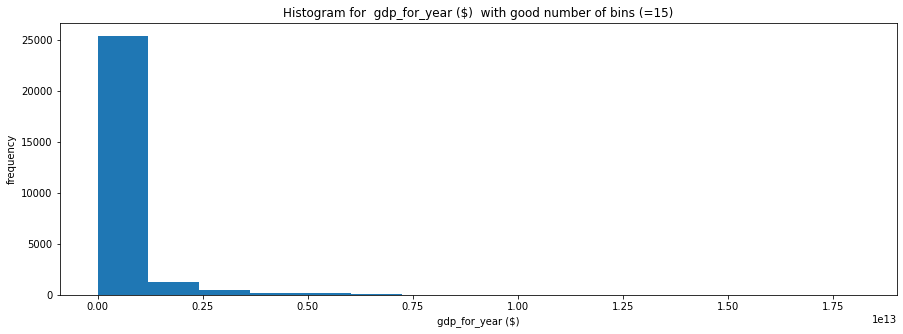

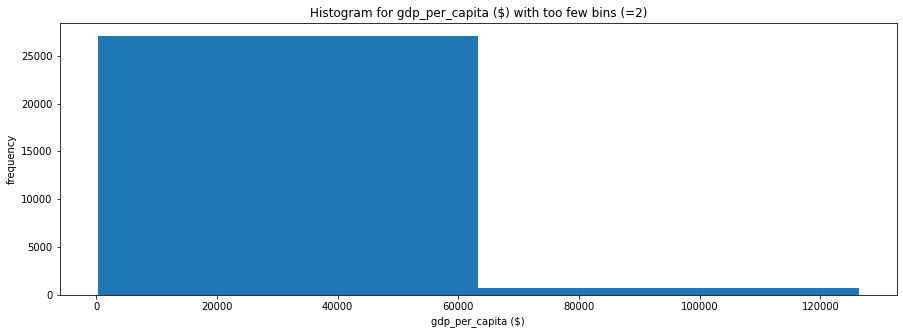

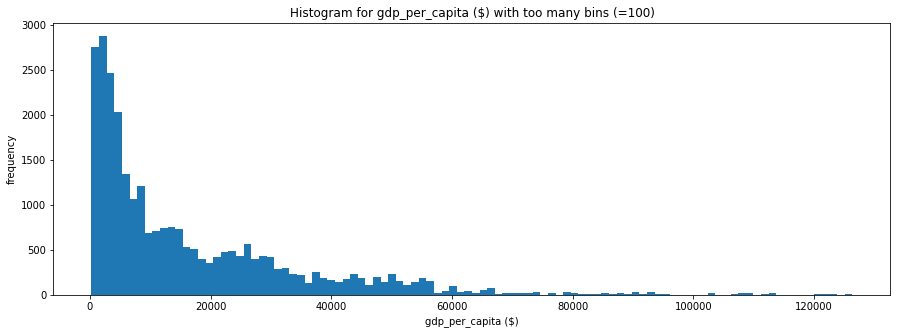

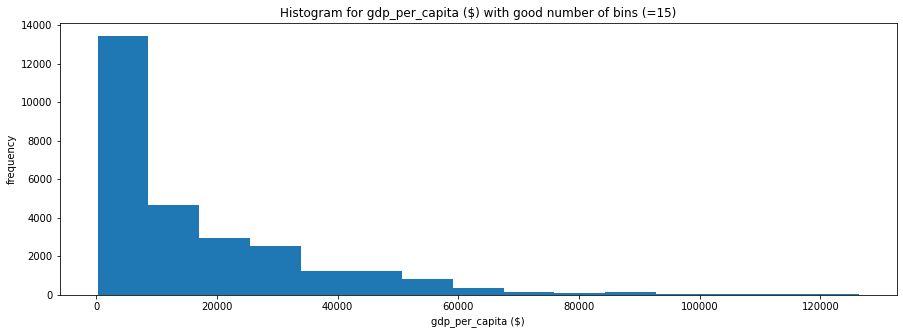

In [20]:
for var in cont_var:
    plt.figure(figsize=(15, 5))
    plt.hist(df[var],bins=2)
    plt.xlabel(var)
    plt.ylabel("frequency")
    plt.title("Histogram for " + var + " with too few bins (=2)")
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.hist(df[var],bins=100)
    plt.xlabel(var)
    plt.ylabel("frequency")
    plt.title("Histogram for " + var + " with too many bins (=100)")
    plt.show()

    plt.figure(figsize=(15, 5))
    plt.hist(df[var],bins=15)
    plt.xlabel(var)
    plt.ylabel("frequency")
    plt.title("Histogram for " + var + " with good number of bins (=15)")
    plt.show()

## QQ-Plot to see deviation of variables

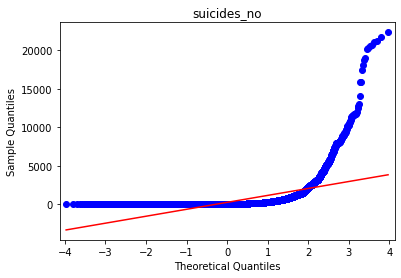

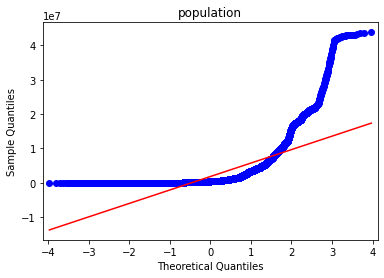

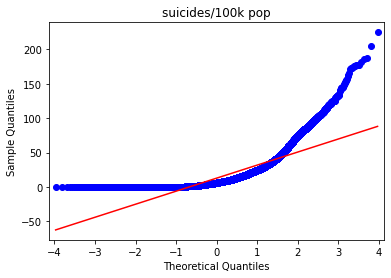

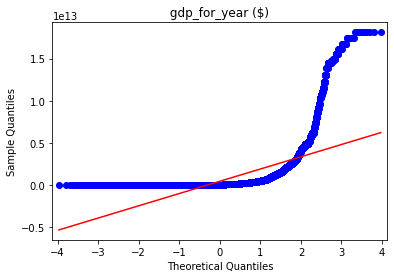

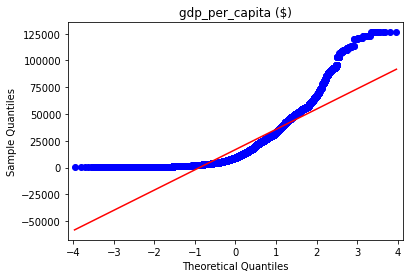

In [21]:
for var in cont_var:
  fig = sm.qqplot(df[var],line="s")
  plt.title(var)
  plt.show()

## From the above QQ-plots we can deduce the following about skewness of data:

1.) "suicides_no": Right Skewed \\
2.) "population": Right Skewed \\
3.) "suicides/100k pop":  Right Skewed \\
4.) " gdp_for_year (\$) ": Right Skewed \\
5.) "gdp_per_capita (\$)": Right Skewed \\



## Checking if variable deviates is log-normal

This is done by plotting the qq plots of the log of the variables 
A small delta (= 10^(-7)) is introduced to avoid non-finite errors if the variable attains value 0

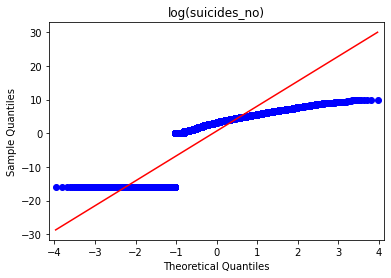

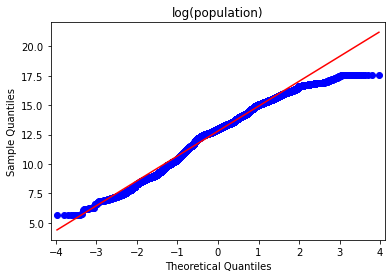

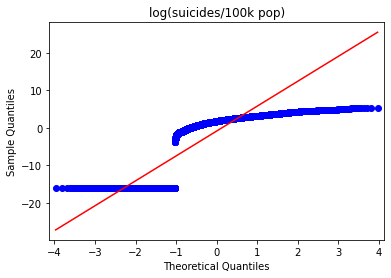

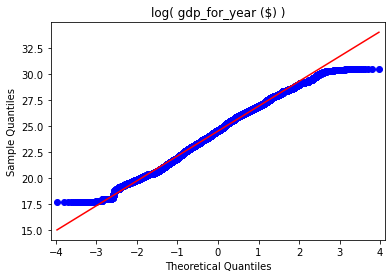

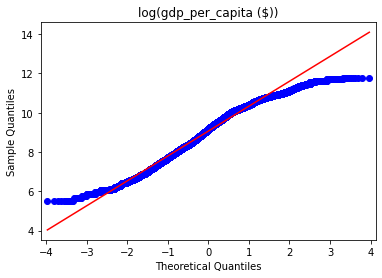

In [22]:
delta = 0.0000001
for var in cont_var:
  fig = sm.qqplot(np.log(df[var] + delta), line="s")
  plt.title("log("+var+")")
  plt.show()


From the above plots we can conclude the following:

suicides_no: not log-normal<br>
population: log-normal<br>
suicides/100k pop: not log-normal<br>
gdp_per_capita (\$): log-normal<br>
gdp_for_year (\$): log-normal<br>

# Pairwise Interaction

We take the following two pairs of discrete-continuous variables

(i.) generation-suicides_no

(ii.) sex-population

### generation-suicides_no

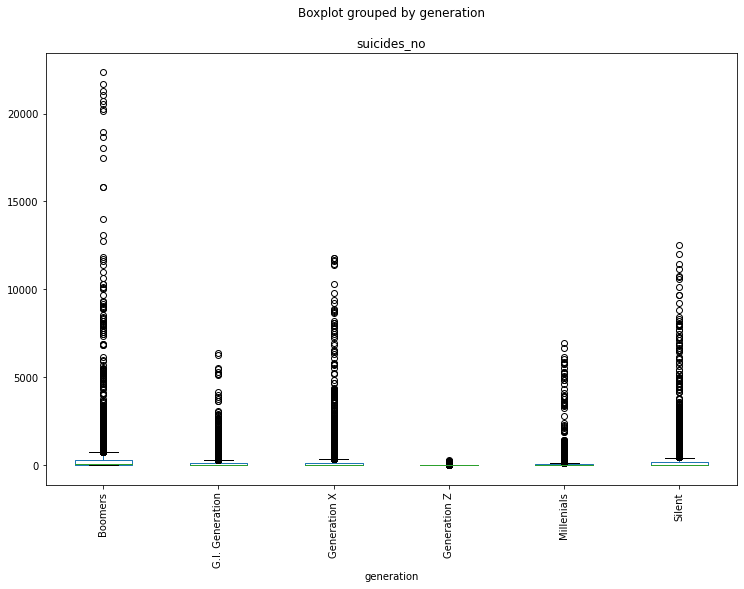

<Figure size 1080x720 with 0 Axes>

In [23]:
df.boxplot(by='generation', column='suicides_no',grid=False,rot=90, figsize=(12,8))
plt.figure(figsize=(15,10))
plt.show()

### sex-population

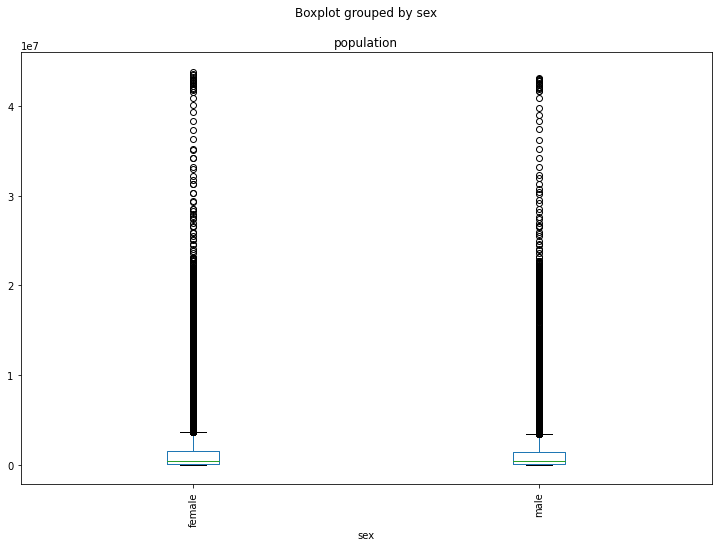

<Figure size 1080x720 with 0 Axes>

In [24]:
df.boxplot(by='sex', column='population',grid=False,rot=90, figsize=(12,8))
plt.figure(figsize=(15,10))
plt.show()

## Heatmap of correlation between all pairs of continuous variables

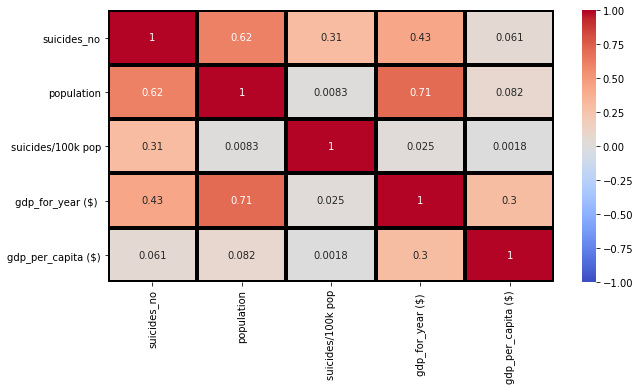

In [25]:
plt.subplots(figsize=(10, 5))
sns.heatmap(df[cont_var].corr(),annot=True,vmin=-1, vmax=1, center= 0,cmap= 'coolwarm', linewidths=3, linecolor='black')

# Creative Part

Plotting scatter plot for 'suicides_no' vs 'population' 

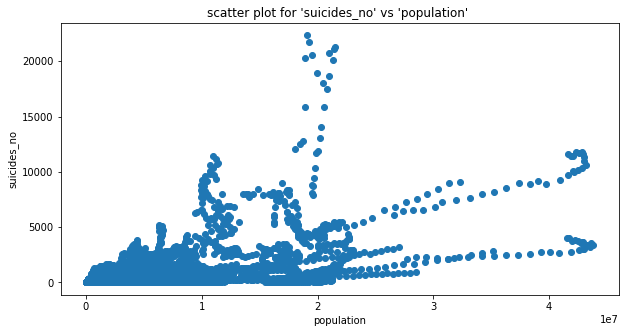

In [26]:
plt.figure(figsize=(10,5))
plt.title("scatter plot for 'suicides_no' vs 'population' ")
plt.xlabel("population")
plt.ylabel("suicides_no")
plt.scatter(df["population"],df["suicides_no"])
plt.show()

The above scatter plots show an increasing relation between suicides and population. However, it can be clearly seen that the relation is not linear.